<a href="https://colab.research.google.com/github/vedant0321/Day_time_detection/blob/main/Day_Time_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install kaggle
from google.colab import files
files.upload()

Dataset URL: https://www.kaggle.com/datasets/aymenkhouja/timeofdaydataset
License(s): other
 94% 21.0M/22.4M [00:02<00:00, 10.2MB/s]
100% 22.4M/22.4M [00:02<00:00, 9.20MB/s]
Archive:  timeofdaydataset.zip
  inflating: timeofdaydataset/daytime/daylight_0.jpeg  
  inflating: timeofdaydataset/daytime/daylight_1.jpeg  
  inflating: timeofdaydataset/daytime/daylight_10.jpeg  
  inflating: timeofdaydataset/daytime/daylight_100.jpeg  
  inflating: timeofdaydataset/daytime/daylight_101.jpeg  
  inflating: timeofdaydataset/daytime/daylight_102.jpeg  
  inflating: timeofdaydataset/daytime/daylight_103.jpeg  
  inflating: timeofdaydataset/daytime/daylight_105.jpeg  
  inflating: timeofdaydataset/daytime/daylight_106.jpeg  
  inflating: timeofdaydataset/daytime/daylight_107.jpeg  
  inflating: timeofdaydataset/daytime/daylight_109.jpeg  
  inflating: timeofdaydataset/daytime/daylight_11.jpeg  
  inflating: timeofdaydataset/daytime/daylight_110.jpeg  
  inflating: timeofdaydataset/daytime/daylight_

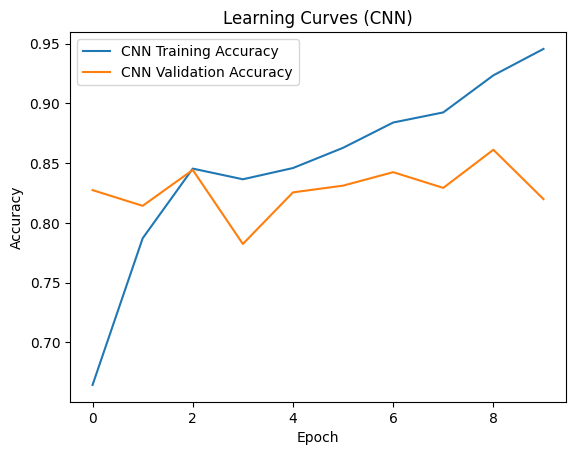

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Subset of Predicted Images:


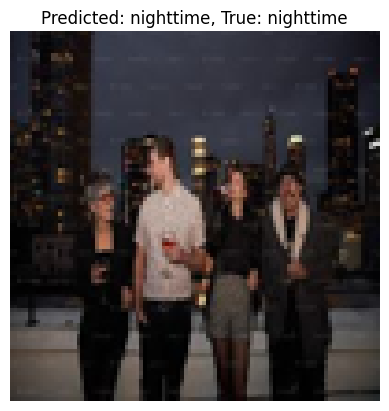

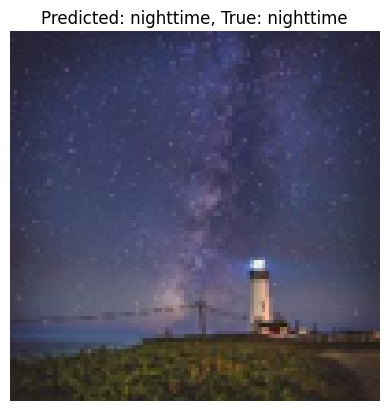

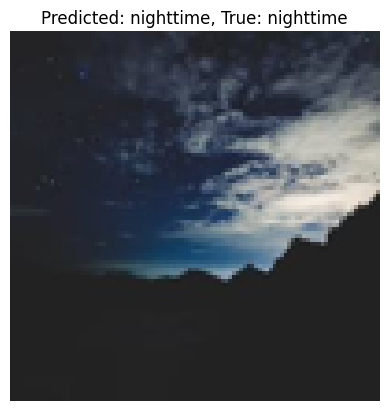

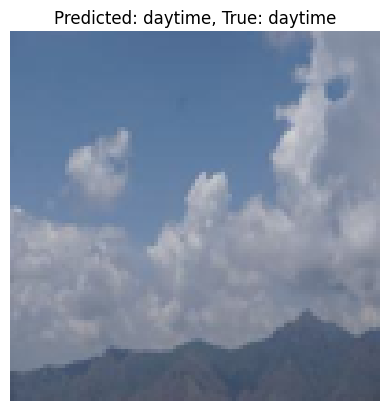

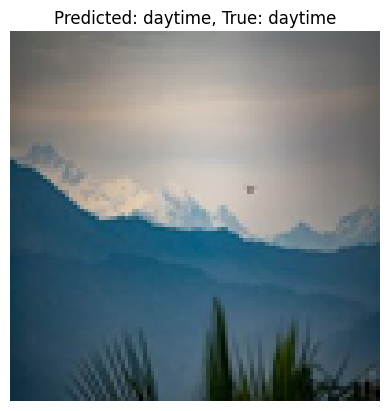

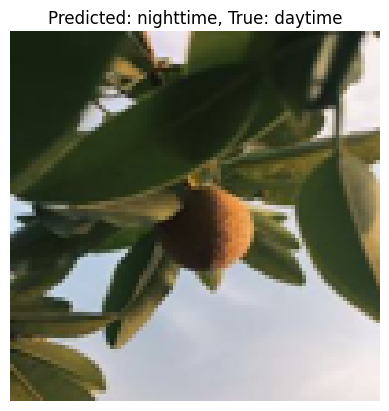

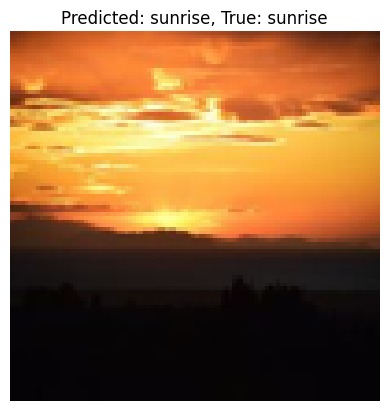

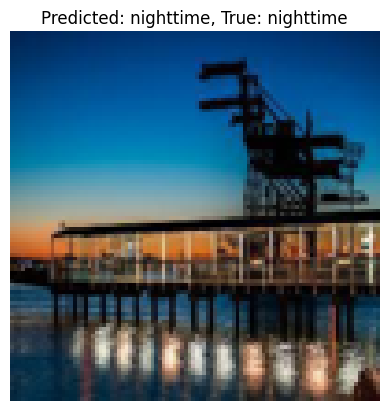

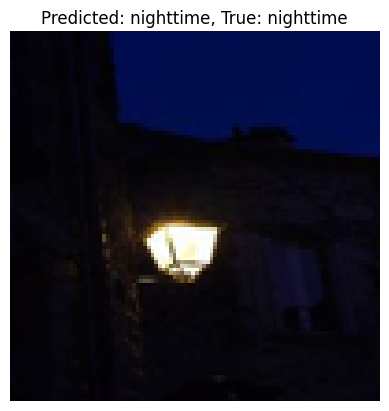

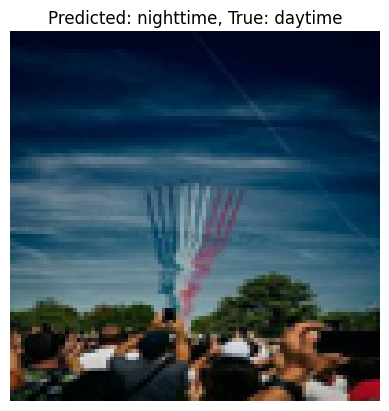

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step


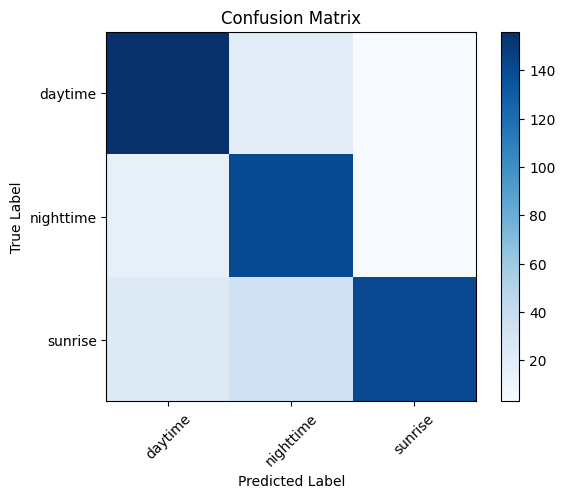

In [ ]:

import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d aymenkhouja/timeofdaydataset
!unzip timeofdaydataset.zip -d timeofdaydataset


dataset_directory = '/content/timeofdaydataset'

def load_images(directory):
    X = []
    y = []
    for category in os.listdir(directory):
        category_dir = os.path.join(directory, category)
        if os.path.isdir(category_dir):
            for filename in os.listdir(category_dir):
                if filename.endswith('.jpeg') or filename.endswith('.png'):
                    image_path = os.path.join(category_dir, filename)
                    image = Image.open(image_path)
                    image = image.resize((100, 100))
                    image = np.array(image)
                    X.append(image)
                    y.append(category)
    X = np.array(X)
    y = np.array(y)
    return X, y


X, y = load_images(dataset_directory)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

inputs = Input(shape=(100, 100, 3))
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
cnn_outputs = Dense(len(label_encoder.classes_), activation='softmax')(x)

cnn_model = Model(inputs=inputs, outputs=cnn_outputs)
cnn_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_history = cnn_model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_test, y_test)
)

cnn_accuracy = cnn_history.history['val_accuracy'][-1]
print("CNN Accuracy:", cnn_accuracy)

plt.figure()
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.title("Learning Curves (CNN)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

subset_indices = np.random.choice(len(X_test), size=10, replace=False)
subset_images = X_test[subset_indices]
subset_labels = y_test[subset_indices]

subset_predictions = cnn_model.predict(subset_images)
subset_predicted_labels = np.argmax(subset_predictions, axis=1)
subset_predicted_labels = label_encoder.inverse_transform(subset_predicted_labels)

subset_true_labels = label_encoder.inverse_transform(subset_labels)

print("Subset of Predicted Images:")
for i in range(len(subset_images)):
    plt.figure()
    plt.imshow(subset_images[i])
    plt.title(f"Predicted: {subset_predicted_labels[i]}, True: {subset_true_labels[i]}")
    plt.axis('off')
    plt.show()

y_pred = np.argmax(cnn_model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_, rotation=45)
plt.yticks(tick_marks, label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Saving daylight_43.jpeg to daylight_43.jpeg
Saving daylight_44.jpeg to daylight_44.jpeg
Saving daylight_45.jpeg to daylight_45.jpeg
Saving daylight_46.jpeg to daylight_46.jpeg
Saving daylight_47.jpeg to daylight_47.jpeg
Saving daylight_48.jpeg to daylight_48.jpeg
Saving daylight_49.jpeg to daylight_49.jpeg
Saving Nighttime_7.jpeg to Nighttime_7.jpeg
Saving Nighttime_8.jpeg to Nighttime_8.jpeg
Saving Nighttime_9.jpeg to Nighttime_9.jpeg
Saving Nighttime_10.jpeg to Nighttime_10.jpeg
Saving Nighttime_11.jpeg to Nighttime_11.jpeg
Saving Nighttime_12.jpeg to Nighttime_12.jpeg
Saving Nighttime_13.jpeg to Nighttime_13.jpeg
Saving Nighttime_14.jpeg to Nighttime_14.jpeg
Saving sunrise_7.jpeg to sunrise_7.jpeg
Saving sunrise_10.jpeg to sunrise_10.jpeg
Saving sunrise_11.jpeg to sunrise_11.jpeg
Saving sunrise_13.jpeg to sunrise_13.jpeg
Saving sunrise_14.jpeg to sunrise_14.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


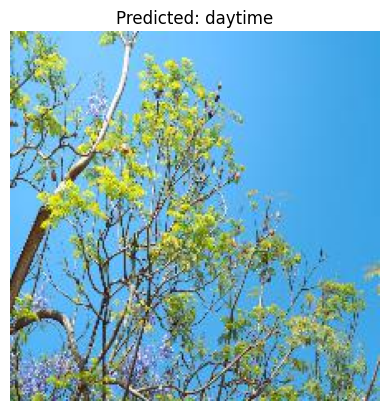

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


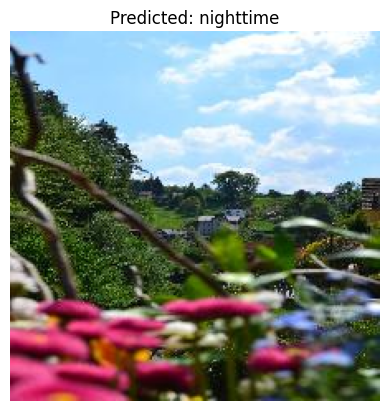

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


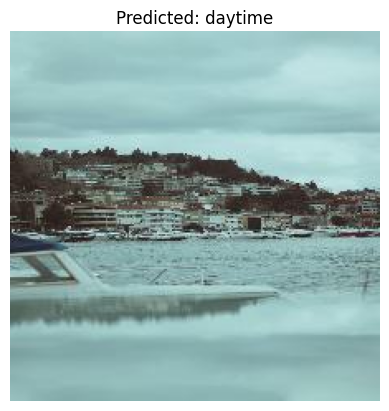

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


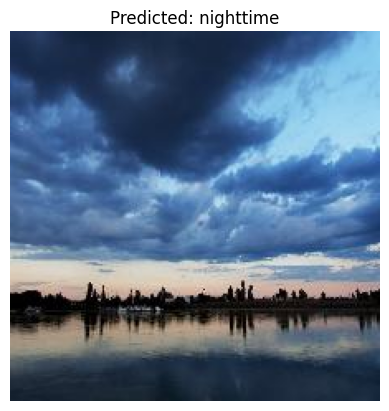

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


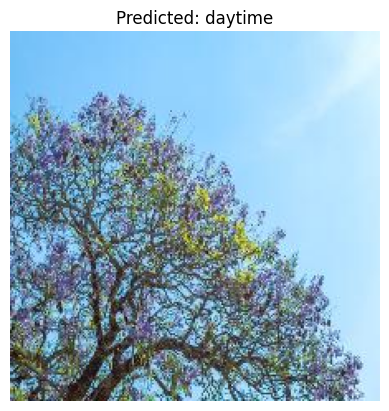

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


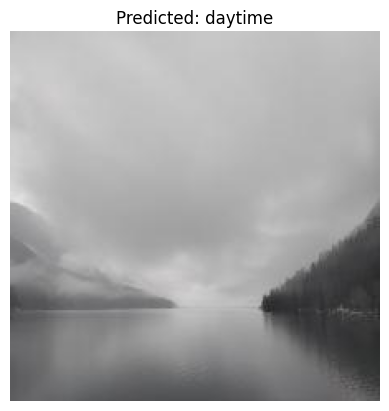

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


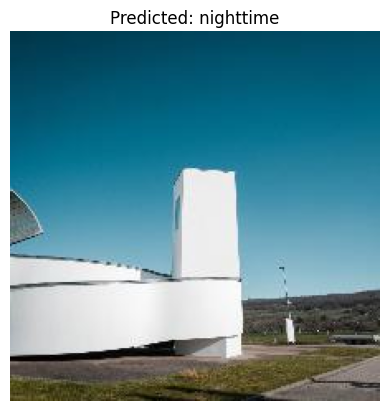

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


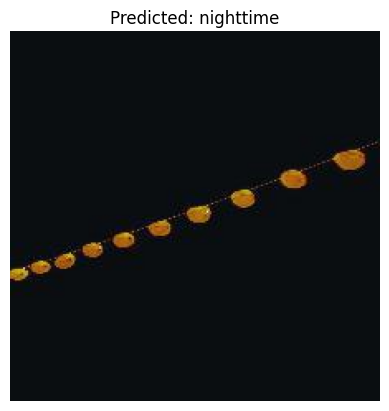

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


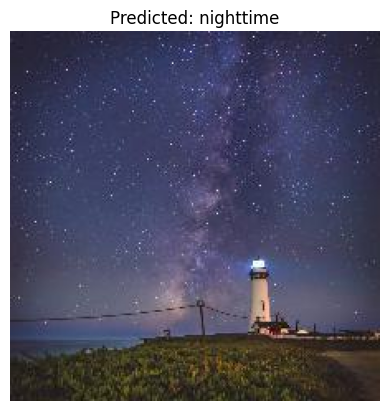

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


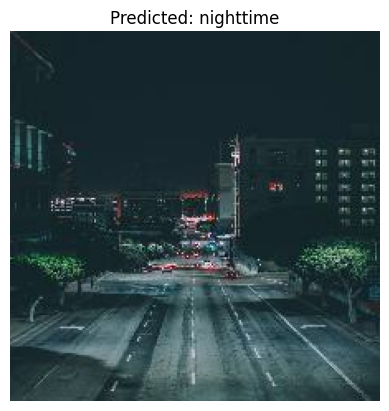

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


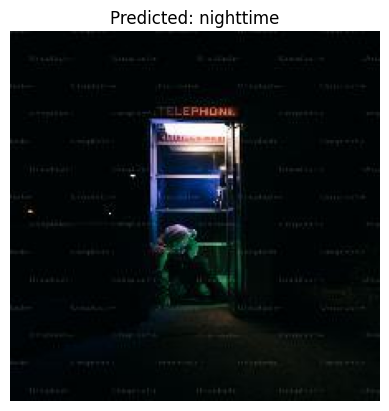

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


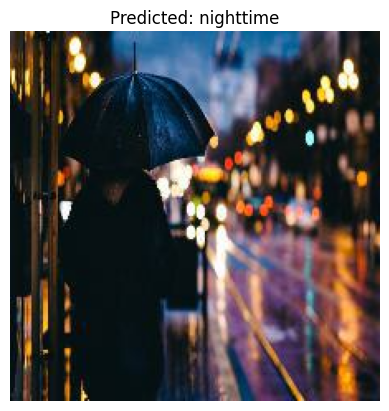

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


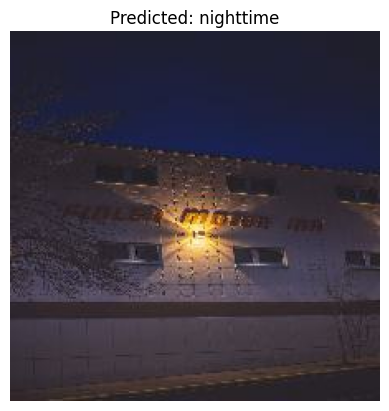

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


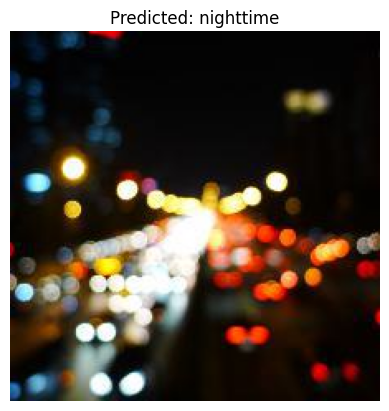

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


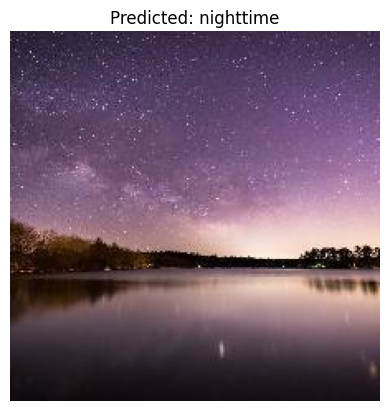

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


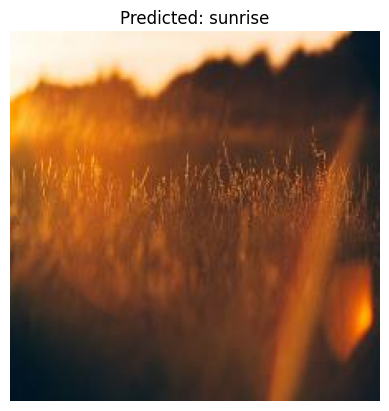

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


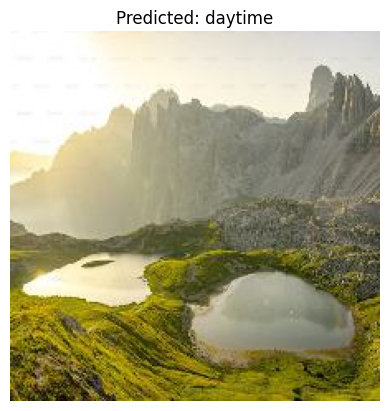

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


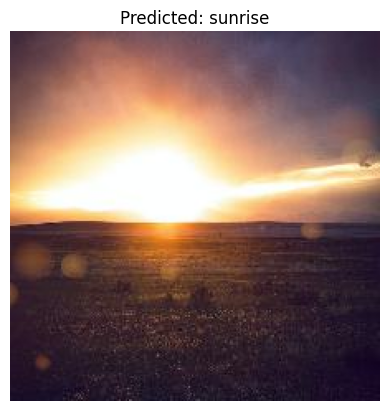

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


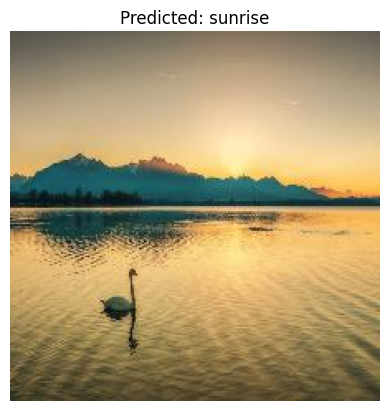

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


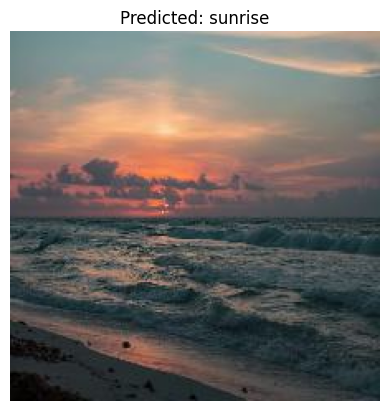

In [ ]:
from google.colab import files
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def preprocess_image(image_path):
  image = Image.open(image_path)
  image = image.resize((100, 100))
  image = np.array(image)
  image = np.expand_dims(image, axis=0)
  return image

uploaded = files.upload()

for fn in uploaded.keys():
  image_path = fn
  image = preprocess_image(image_path)

  prediction = cnn_model.predict(image)
  predicted_label_index = np.argmax(prediction)
  predicted_label = label_encoder.inverse_transform([predicted_label_index])[0]

  plt.imshow(Image.open(image_path))
  plt.title(f"Predicted: {predicted_label}")
  plt.axis('off')
  plt.show()
